# The Bias-Complexity Tradeoff — Lecture 6: Visual Guide

This notebook walks through every concept in **Lecture 6 (The Bias-Complexity Tradeoff)** with
interactive visualizations that match the slide diagrams.

> Each section header notes the **slide numbers** it covers.
> 🗣️ **Plain English** blocks explain every piece of math in everyday language.

---

**Prerequisites**: Lecture 5 (PAC Learning). We showed that any finite, realizable $\mathcal{H}$ is PAC
learnable via ERM with 0-1 loss, with sample complexity:

$$m_{\mathcal{H}}(\epsilon, \delta) \leq \left\lceil \frac{\log(|\mathcal{H}|/\delta)}{\epsilon} \right\rceil$$

### Breaking Down the Recap

---

#### Part by Part

**$m_{\mathcal{H}}(\epsilon, \delta)$** — sample complexity

The minimum number of training examples $m$ needed so that ERM is guaranteed to produce a hypothesis with true error $\leq \epsilon$, with probability $\geq 1 - \delta$.

**$\lceil \cdot \rceil$** — ceiling function

Round up to the nearest integer, because we can't have a fraction of a training example.

**$\log(|\mathcal{H}|/\delta)$** — the numerator

This grows with $|\mathcal{H}|$ (more hypotheses → need more data) and shrinks with $\delta$ (wanting higher confidence → need more data).

**$\epsilon$** — the denominator

Smaller tolerance for error → bigger fraction → need more data.

---

#### The Whole Thing

> "To guarantee that ERM learns a hypothesis with true error $\leq \epsilon$ with probability $\geq 1 - \delta$, you need at most $\lceil \log(|\mathcal{H}|/\delta) / \epsilon \rceil$ training examples."

---

**Running examples** (used throughout):
- **1D threshold classifiers** on $\mathcal{X} = \{0, 1, 2, \ldots, 19\}$ with $|\mathcal{X}| = 20$
- **Nested hypothesis classes** of varying size to illustrate the tradeoff

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
import matplotlib.patches as mpatches
from itertools import product
import warnings

plt.rcParams['figure.dpi'] = 130
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['axes.labelsize'] = 12
np.random.seed(42)

# === Domain ===
X_SIZE = 20                                 # |X| = 20
X_DOMAIN = np.arange(X_SIZE)               # {0, 1, ..., 19}

# === Helper: generate all possible binary labelings ===
def all_labelings(n):
    '''All 2^n binary labelings of n points.'''
    return np.array(list(product([0, 1], repeat=n)))

# === Helper: threshold classifiers ===
def threshold_predict(x, threshold):
    '''h_t(x) = 1 if x >= threshold, else 0.'''
    return (x >= threshold).astype(int)

# === Helper: true error of a hypothesis h w.r.t. labels f under uniform distribution ===
def true_error_uniform(h_pred, f_labels):
    '''L_D(h) = fraction of domain where h != f (uniform D).'''
    return np.mean(h_pred != f_labels)

# === Helper: training error ===
def training_error(h_pred_on_S, y_S):
    '''L_S(h) = fraction of training examples where h != y.'''
    return np.mean(h_pred_on_S != y_S)

print(f"Domain X = {{0, 1, ..., {X_SIZE-1}}}, |X| = {X_SIZE}")
print(f"Total possible binary labelings: 2^{X_SIZE} = {2**X_SIZE}")

Domain X = {0, 1, ..., 19}, |X| = 20
Total possible binary labelings: 2^20 = 1048576


---
## Slides 3–5 — Motivation: Which Hypothesis Class Would You Choose?

The slides show two different hypothesis classes applied to the same data:
- A **simple** class (e.g., halfspaces) that might underfit complex patterns
- A **complex** class (e.g., intersections of halfspaces) that could capture more but might overfit

**Key question**: *Does an algorithm exist that would successfully learn in all cases?*

The answer is **no** — and the No-Free-Lunch theorem tells us why.

### Breaking Down the Intuition

---

#### The Dilemma

Imagine choosing a restaurant from a menu:
- **Too restrictive** (only salads): You'll never find a great steak, no matter how many restaurants you try.
- **Too broad** (the entire menu of every restaurant in the city): You'll be overwhelmed and might pick something terrible.

The same applies to hypothesis classes:
- **Too small** $\mathcal{H}$: The best model in the class might still have high error (underfitting).
- **Too large** $\mathcal{H}$: With limited data, you might accidentally pick a terrible model that just happens to fit the training set (overfitting).

/Users/jack/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3526: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


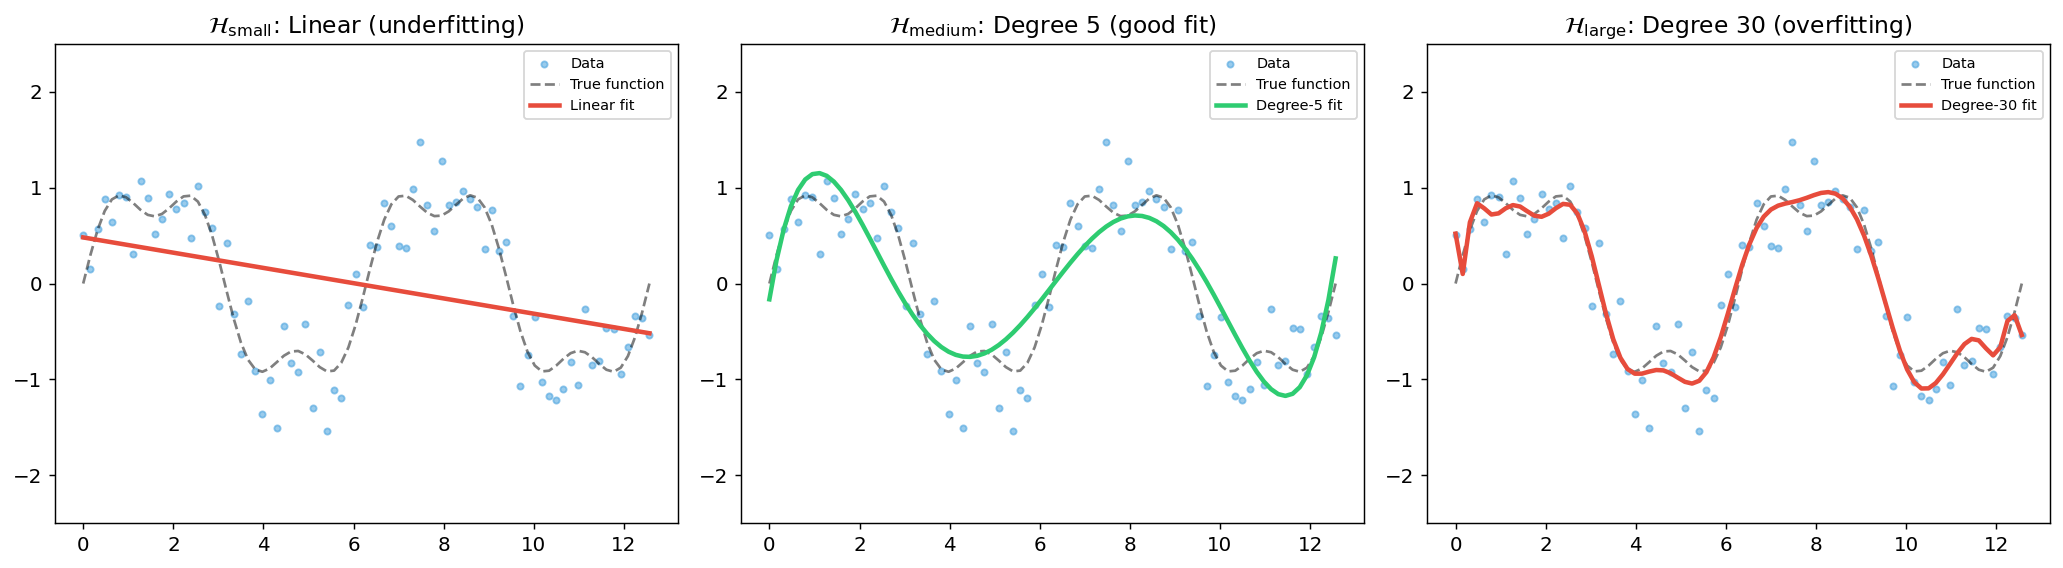

In [2]:
# Motivation: Simple vs Complex hypothesis class on the same data

np.random.seed(7)
x_pts = np.linspace(0, 4*np.pi, 80)
y_true = np.sin(x_pts) + 0.3 * np.sin(3*x_pts)
y_noisy = y_true + np.random.normal(0, 0.3, len(x_pts))

fig, axes = plt.subplots(1, 3, figsize=(16, 4.5))

# --- LEFT: underfitting (linear) ---
ax = axes[0]
coeffs1 = np.polyfit(x_pts, y_noisy, 1)
y_fit1 = np.polyval(coeffs1, x_pts)
ax.scatter(x_pts, y_noisy, s=12, alpha=0.5, color='#3498db', label='Data')
ax.plot(x_pts, y_true, 'k--', linewidth=1.5, alpha=0.5, label='True function')
ax.plot(x_pts, y_fit1, color='#e74c3c', linewidth=2.5, label='Linear fit')
ax.set_title(r'$\mathcal{H}_{\mathrm{small}}$: Linear (underfitting)')
ax.legend(fontsize=8)
ax.set_ylim(-2.5, 2.5)

# --- MIDDLE: good fit ---
ax = axes[1]
coeffs5 = np.polyfit(x_pts, y_noisy, 5)
y_fit5 = np.polyval(coeffs5, x_pts)
ax.scatter(x_pts, y_noisy, s=12, alpha=0.5, color='#3498db', label='Data')
ax.plot(x_pts, y_true, 'k--', linewidth=1.5, alpha=0.5, label='True function')
ax.plot(x_pts, y_fit5, color='#2ecc71', linewidth=2.5, label='Degree-5 fit')
ax.set_title(r'$\mathcal{H}_{\mathrm{medium}}$: Degree 5 (good fit)')
ax.legend(fontsize=8)
ax.set_ylim(-2.5, 2.5)

# --- RIGHT: overfitting ---
ax = axes[2]
coeffs30 = np.polyfit(x_pts, y_noisy, 30)
y_fit30 = np.polyval(coeffs30, x_pts)
ax.scatter(x_pts, y_noisy, s=12, alpha=0.5, color='#3498db', label='Data')
ax.plot(x_pts, y_true, 'k--', linewidth=1.5, alpha=0.5, label='True function')
ax.plot(x_pts, y_fit30, color='#e74c3c', linewidth=2.5, label='Degree-30 fit')
ax.set_title(r'$\mathcal{H}_{\mathrm{large}}$: Degree 30 (overfitting)')
ax.legend(fontsize=8)
ax.set_ylim(-2.5, 2.5)

plt.tight_layout()
plt.show()

---
## Slides 6–7 — The No-Free-Lunch Theorem

**Theorem 5.1 (No-Free-Lunch)**:
Let $A$ be any learning algorithm for binary classification with 0-1 loss over domain $\mathcal{X}$.
Let $m$ be any number smaller than $|\mathcal{X}|/2$. Then there exists a distribution $\mathcal{D}$
over $\mathcal{X} \times \{0,1\}$ such that:

1. There exists $f : \mathcal{X} \to \{0,1\}$ with $L_{\mathcal{D}}(f) = 0$.
2. With probability $\geq 1/7$ over $S \sim \mathcal{D}^m$: $\quad L_{\mathcal{D}}(A(S)) \geq 1/8$.

### Breaking Down the No-Free-Lunch Theorem

---

#### Part by Part

**$A$** — any learning algorithm

This is completely general. It doesn't matter how clever $A$ is — the theorem applies to *every possible* algorithm.

**$\mathcal{X}$** — the domain (set of all possible inputs)

The space where data lives. Could be images, numbers, feature vectors — anything.

**$m < |\mathcal{X}|/2$** — training set is smaller than half the domain

The learner sees fewer than half of all possible inputs. This is the key limitation.

**$\mathcal{D}$** — a distribution the adversary gets to pick

After you choose your algorithm $A$ and training size $m$, an adversary can always find some data distribution that breaks your algorithm.

**$L_{\mathcal{D}}(f) = 0$** — a perfect labeling exists

There *is* a correct answer — some function $f$ that labels everything perfectly. The problem isn't that the task is impossible.

**$L_{\mathcal{D}}(A(S)) \geq 1/8$** — the algorithm still fails badly

Even though a perfect solution exists, the algorithm makes mistakes on at least 1/8 of the distribution.

**Probability $\geq 1/7$** — this failure isn't a rare fluke

It happens with decent probability — at least 1 in 7 training sets lead to this bad outcome.

---

#### The Whole Thing

> "No matter what learning algorithm you use, if you see fewer than half the possible inputs, an adversary can always design a problem where (a) a perfect classifier exists, but (b) your algorithm outputs a bad one with probability at least 1/7."

#### Why It Matters

This says **no universal learner exists**. Every algorithm must fail on some task. You *must* bring prior knowledge (i.e., choose $\mathcal{H}$) to succeed.

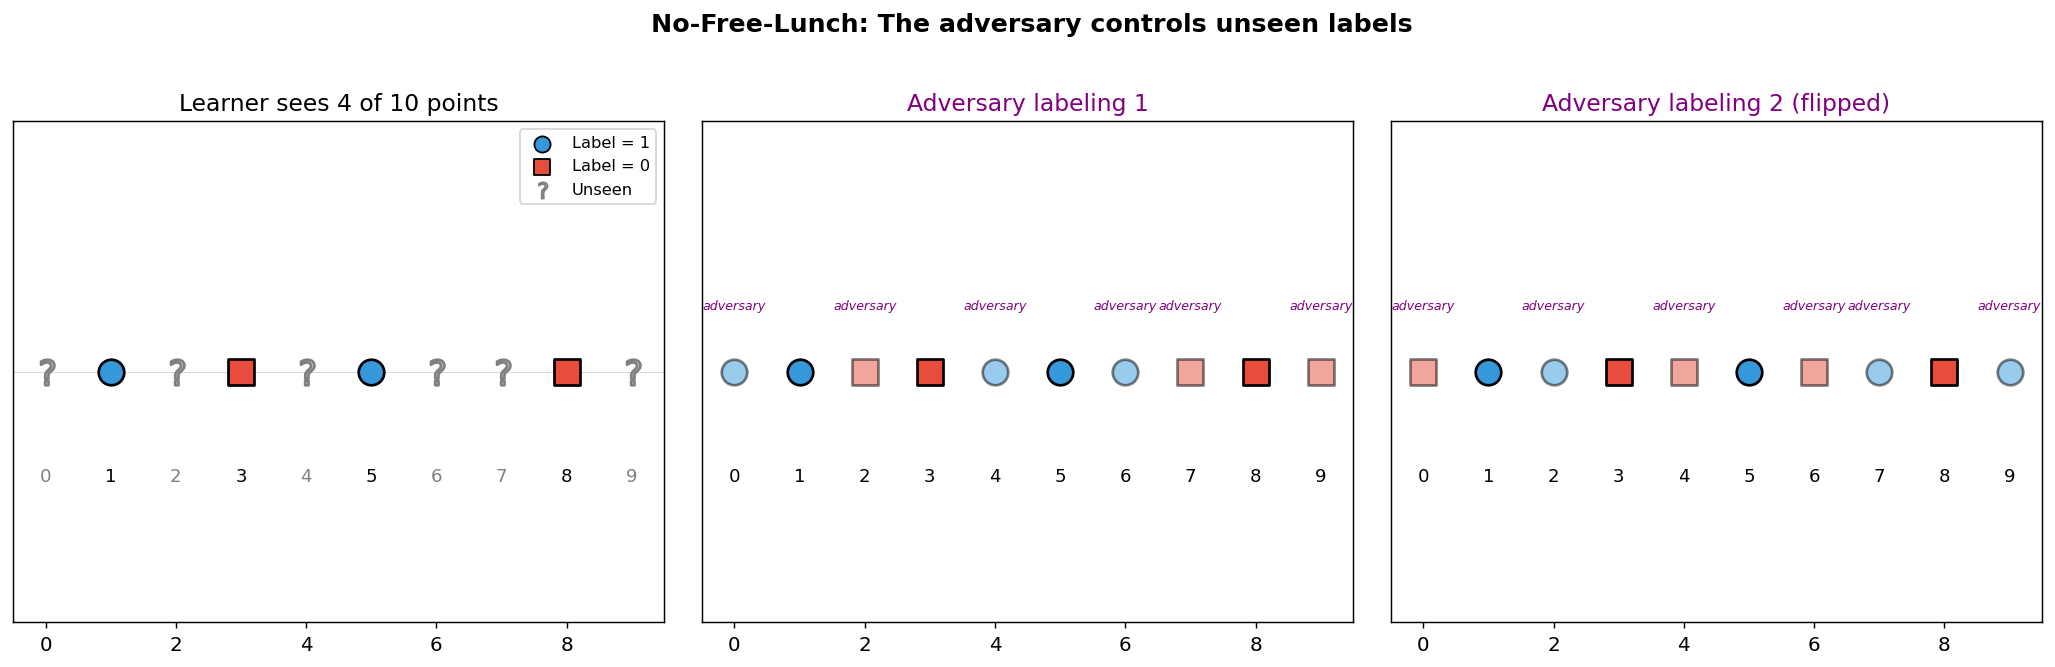

In [3]:
# No-Free-Lunch: Proof Intuition
# An adversary picks a labeling AFTER seeing what the learner doesn't know.

np.random.seed(42)
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

domain_size = 10
domain = np.arange(domain_size)
m = 4  # training set size (m < |X|/2 = 5)

# Training indices (what the learner sees)
train_idx = np.array([1, 3, 5, 8])
unseen_idx = np.array([i for i in range(domain_size) if i not in train_idx])

# --- LEFT: What the learner sees ---
ax = axes[0]
# A fixed labeling for training points
train_labels = np.array([1, 0, 1, 0])
for i, idx in enumerate(train_idx):
    c = '#3498db' if train_labels[i] == 1 else '#e74c3c'
    m_style = 'o' if train_labels[i] == 1 else 's'
    ax.scatter(idx, 0.5, c=c, s=200, marker=m_style, edgecolor='black',
               linewidth=1.5, zorder=5)
    ax.text(idx, 0.15, str(idx), ha='center', fontsize=10)

for idx in unseen_idx:
    ax.scatter(idx, 0.5, c='lightgray', s=200, marker=r'$?$', edgecolor='gray',
               linewidth=1.5, zorder=5)
    ax.text(idx, 0.15, str(idx), ha='center', fontsize=10, color='gray')

ax.set_xlim(-0.5, domain_size - 0.5)
ax.set_ylim(-0.3, 1.3)
ax.set_yticks([])
ax.set_title(f'Learner sees {m} of {domain_size} points', fontsize=13)
ax.axhline(y=0.5, color='lightgray', linewidth=0.5, zorder=0)

# Legend
ax.scatter([], [], c='#3498db', s=80, marker='o', edgecolor='black', label='Label = 1')
ax.scatter([], [], c='#e74c3c', s=80, marker='s', edgecolor='black', label='Label = 0')
ax.scatter([], [], c='lightgray', s=80, marker=r'$?$', edgecolor='gray', label='Unseen')
ax.legend(fontsize=9, loc='upper right')

# --- MIDDLE: Adversary labeling 1 ---
ax = axes[1]
adv_labels_1 = np.zeros(domain_size, dtype=int)
adv_labels_1[train_idx] = train_labels
adv_labels_1[unseen_idx] = [1, 0, 1, 1, 0, 0]  # adversary picks these

for i in range(domain_size):
    if i in train_idx:
        c = '#3498db' if adv_labels_1[i] == 1 else '#e74c3c'
        ax.scatter(i, 0.5, c=c, s=200, marker='o' if adv_labels_1[i]==1 else 's',
                   edgecolor='black', linewidth=1.5, zorder=5)
    else:
        c = '#3498db' if adv_labels_1[i] == 1 else '#e74c3c'
        ax.scatter(i, 0.5, c=c, s=200, marker='o' if adv_labels_1[i]==1 else 's',
                   edgecolor='black', linewidth=1.5, zorder=5, alpha=0.5)
        ax.annotate('adversary', xy=(i, 0.7), fontsize=7, ha='center', color='purple',
                    fontstyle='italic')
    ax.text(i, 0.15, str(i), ha='center', fontsize=10)

ax.set_xlim(-0.5, domain_size - 0.5)
ax.set_ylim(-0.3, 1.3)
ax.set_yticks([])
ax.set_title('Adversary labeling 1', fontsize=13, color='purple')

# --- RIGHT: Adversary labeling 2 (flipped unseen) ---
ax = axes[2]
adv_labels_2 = np.zeros(domain_size, dtype=int)
adv_labels_2[train_idx] = train_labels
adv_labels_2[unseen_idx] = [0, 1, 0, 0, 1, 1]  # opposite of labeling 1

for i in range(domain_size):
    if i in train_idx:
        c = '#3498db' if adv_labels_2[i] == 1 else '#e74c3c'
        ax.scatter(i, 0.5, c=c, s=200, marker='o' if adv_labels_2[i]==1 else 's',
                   edgecolor='black', linewidth=1.5, zorder=5)
    else:
        c = '#3498db' if adv_labels_2[i] == 1 else '#e74c3c'
        ax.scatter(i, 0.5, c=c, s=200, marker='o' if adv_labels_2[i]==1 else 's',
                   edgecolor='black', linewidth=1.5, zorder=5, alpha=0.5)
        ax.annotate('adversary', xy=(i, 0.7), fontsize=7, ha='center', color='purple',
                    fontstyle='italic')
    ax.text(i, 0.15, str(i), ha='center', fontsize=10)

ax.set_xlim(-0.5, domain_size - 0.5)
ax.set_ylim(-0.3, 1.3)
ax.set_yticks([])
ax.set_title('Adversary labeling 2 (flipped)', fontsize=13, color='purple')

fig.suptitle('No-Free-Lunch: The adversary controls unseen labels',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

---
## Slides 8–11 — Example: Popular or Not?

The slides give a fun example with desserts and treats:

| Training Data | Hot? | Vanilla? | Drink? | Popular |
|---|---|---|---|---|
| Ice Cream | F | T | F | T |
| Brownie | T | F | F | F |
| Milkshake | F | T | T | T |

**Test items**: Hot Chocolate (T, F, T, ?) and Vanilla Latte (T, T, T, ?)

No matter what the learner predicts for the test items, the adversary can reveal a labeling rule that makes the learner wrong:

- **Predict both popular?** → "Only non-hot treats are popular!" (both wrong)
- **Predict only Hot Chocolate popular?** → "Only vanilla treats are popular!" (one wrong)
- **Predict only Vanilla Latte popular?** → "Only hot non-vanilla drinks unpopular!" (both wrong)

### Breaking Down Why This Works

---

The adversary always wins because:

1. The test items have **feature combinations not seen in training** (both are hot drinks)
2. The training data is **consistent with multiple labeling rules**
3. For each rule the learner might use, the adversary picks a *different* rule

This is exactly the NFL intuition: the learner has **no information** about the unseen portion of the input space, so the adversary can always arrange things to cause errors.

In [4]:
# No-Free-Lunch: Simulation on a finite domain
# Show that for EVERY fixed algorithm, there exists a bad distribution

np.random.seed(42)

domain_size = 10   # |X| = 10
m = 4              # m < |X|/2 = 5
n_trials = 5000

# We'll test a simple "majority vote" algorithm:
# For each unseen point, predict the label that appeared most in training.
# If tied, predict 0.

def majority_algorithm(train_x, train_y, x_test):
    '''Simple majority-vote learner.'''
    if len(train_y) == 0:
        return 0
    return int(np.mean(train_y) >= 0.5)

# For each possible labeling function f, run the algorithm and measure error
# We sample a subset of labelings (2^10 = 1024, manageable)
all_f = all_labelings(domain_size)  # 1024 labelings
n_f = len(all_f)

worst_error_per_f = []
avg_error_per_f = []

for fi, f in enumerate(all_f):
    errors = []
    for _ in range(n_trials):
        # Draw m training examples uniformly
        S_idx = np.random.choice(domain_size, size=m, replace=True)
        S_x = S_idx
        S_y = f[S_idx]

        # Algorithm predicts on all domain points
        h_pred = np.zeros(domain_size, dtype=int)
        # For seen points, use training label; for unseen, use majority
        for xi in range(domain_size):
            mask = (S_x == xi)
            if np.any(mask):
                h_pred[xi] = int(np.mean(S_y[mask]) >= 0.5)
            else:
                h_pred[xi] = majority_algorithm(S_x, S_y, xi)

        # True error under uniform distribution
        err = np.mean(h_pred != f)
        errors.append(err)

    avg_error_per_f.append(np.mean(errors))
    worst_error_per_f.append(np.max(errors))

avg_error_per_f = np.array(avg_error_per_f)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- LEFT: histogram of average errors across all labelings ---
ax = axes[0]
ax.hist(avg_error_per_f, bins=30, color='#3498db', edgecolor='black', alpha=0.7)
ax.axvline(x=1/8, color='#e74c3c', linewidth=2, linestyle='--',
           label=f'NFL threshold = 1/8')
ax.axvline(x=np.max(avg_error_per_f), color='purple', linewidth=2, linestyle=':',
           label=f'Worst avg error = {np.max(avg_error_per_f):.3f}')
ax.set_xlabel('Average true error')
ax.set_ylabel('Count (over all labelings)')
ax.set_title(f'Majority-vote algorithm on |X|={domain_size}, m={m}')
ax.legend(fontsize=9)

# --- RIGHT: for the worst labeling, show trial error distribution ---
worst_f_idx = np.argmax(avg_error_per_f)
worst_f = all_f[worst_f_idx]

trial_errors = []
for _ in range(n_trials):
    S_idx = np.random.choice(domain_size, size=m, replace=True)
    S_y = worst_f[S_idx]
    h_pred = np.zeros(domain_size, dtype=int)
    for xi in range(domain_size):
        mask = (S_idx == xi)
        if np.any(mask):
            h_pred[xi] = int(np.mean(S_y[mask]) >= 0.5)
        else:
            h_pred[xi] = majority_algorithm(S_idx, S_y, xi)
    trial_errors.append(np.mean(h_pred != worst_f))

trial_errors = np.array(trial_errors)
frac_bad = np.mean(trial_errors >= 1/8)

ax = axes[1]
ax.hist(trial_errors, bins=30, color='#e74c3c', edgecolor='black', alpha=0.7)
ax.axvline(x=1/8, color='black', linewidth=2, linestyle='--',
           label=f'1/8 = {1/8:.3f}')
ax.set_xlabel('True error per trial')
ax.set_ylabel('Count')
ax.set_title(f'Worst-case labeling: P(error $\\geq$ 1/8) = {frac_bad:.2f}')
ax.legend(fontsize=9)
ax.text(0.6, 0.85, f'NFL says $\\geq$ 1/7 = {1/7:.3f}',
        transform=ax.transAxes, fontsize=11, color='purple',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='#f0e6ff', edgecolor='purple'))

plt.tight_layout()
plt.show()
print(f"\nWorst-case labeling: {worst_f}")
print(f"P(L_D(A(S)) >= 1/8) = {frac_bad:.3f} (NFL guarantees >= {1/7:.3f})")

KeyboardInterrupt: 

---
## Slides 12–15 — Takeaways & Relationship to PAC Learning

### Takeaway

For any hypothesis you pick, an adversary can choose data so that even if your loss on training data is 0, your loss on test data can be catastrophically high.

### Relationship to PAC Learning

If $m < |\mathcal{X}|/2$, we get a **lower bound** on sample complexity:

$$\frac{|\mathcal{X}|}{2} \leq m_{\mathcal{H}}\!\left(\frac{1}{8},\frac{1}{7}\right)$$

### Breaking Down the Lower Bound

---

#### Part by Part

**$|\mathcal{X}|/2$** — half the domain size

The NFL theorem requires the adversary to control at least half the domain. So you need to see at least half of everything.

**$m_{\mathcal{H}}(1/8, 1/7)$** — sample complexity at specific values

This is the minimum training set size to guarantee: error $\leq 1/8$ with probability $\geq 6/7$.

---

#### The Whole Thing

> "You need at least $|\mathcal{X}|/2$ training examples to even hope for error $\leq 1/8$ with probability $\geq 6/7$ when learning over the class of all functions."

#### This Does NOT Contradict the Upper Bound

The PAC upper bound $m \leq \lceil \log(|\mathcal{H}|/\delta)/\epsilon \rceil$ assumed **realizability** (a perfect hypothesis exists in $\mathcal{H}$). The NFL lower bound applies to the class of *all* functions — which is unrestricted.

---

### Corollary 5.2

$$\text{If } |\mathcal{X}| = \infty \text{ and } \mathcal{H} = \{f : \mathcal{X} \to \{0,1\}\}, \text{ then } \mathcal{H} \text{ is not PAC learnable.}$$

### Breaking Down Corollary 5.2

---

#### Part by Part

**$|\mathcal{X}| = \infty$** — infinite domain

Think of $\mathcal{X} = \mathbb{R}$ or $\mathcal{X} = \mathbb{R}^d$ — uncountably many possible inputs.

**$\mathcal{H} = \{f : \mathcal{X} \to \{0,1\}\}$** — the class of ALL binary functions

No restriction on what functions we consider. Every possible labeling is in our hypothesis class.

**"Not PAC learnable"** — no algorithm can give PAC guarantees

No finite number of training examples is enough, because $|\mathcal{X}|/2 = \infty$.

---

#### The Whole Thing

> "If you try to learn over *all possible* binary classifiers on an infinite domain, no algorithm can guarantee good generalization — you'd need infinitely many training examples."

#### Key Nuance

This does **NOT** say infinite hypothesis classes are unlearnable! It only says the class of *all* functions is unlearnable. A restricted infinite class (like all halfspaces) might still be learnable — stay tuned for VC dimension!

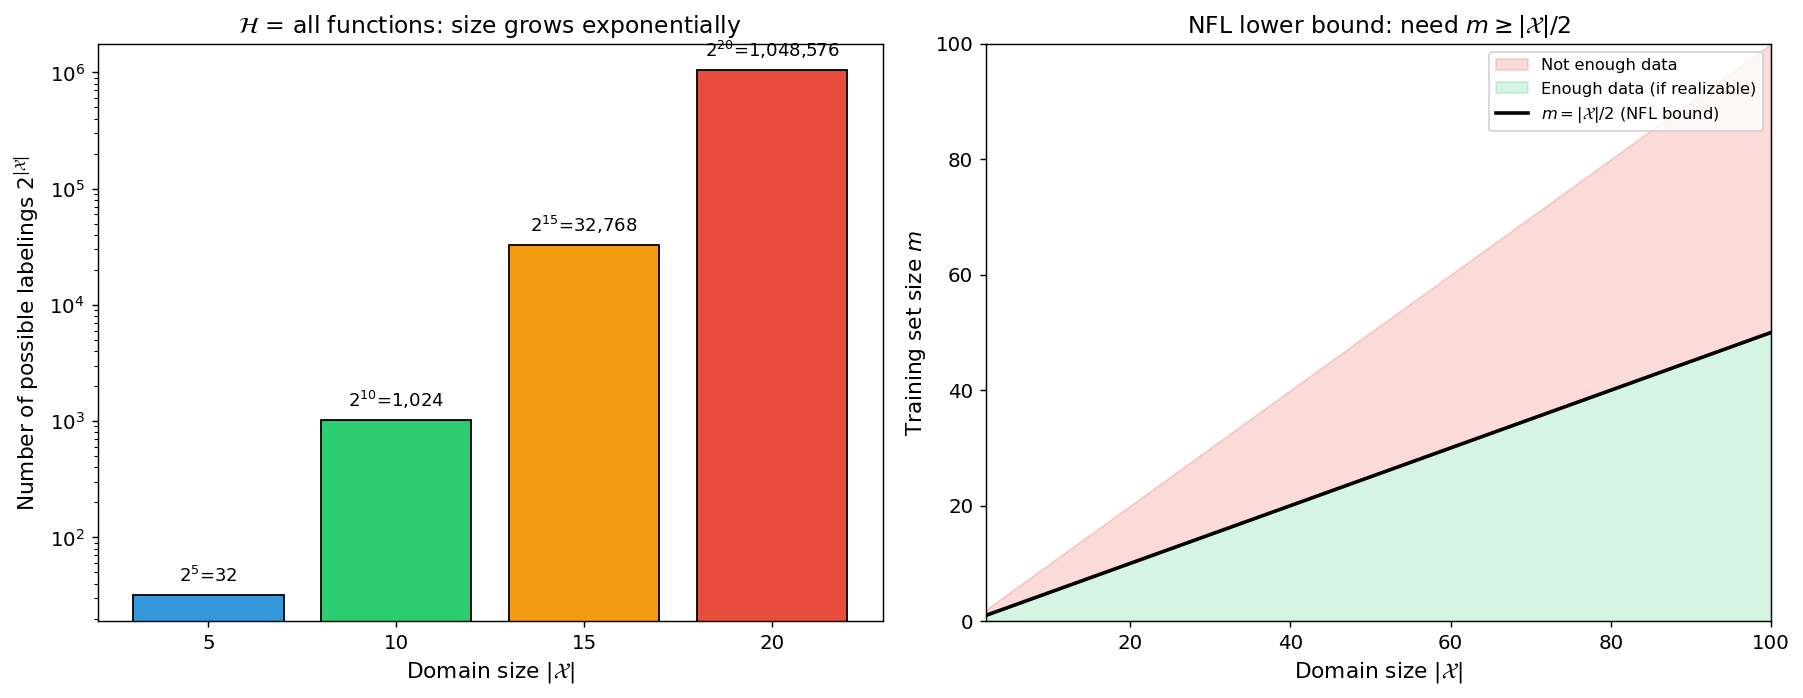

In [5]:
# Visualize: Why H = all functions is unlearnable (NFL consequence)

fig, axes = plt.subplots(1, 2, figsize=(14, 5.5))

# --- LEFT: Finite domain, show how many labelings exist ---
ax = axes[0]
sizes = [5, 10, 15, 20]
n_labelings = [2**s for s in sizes]
bars = ax.bar([str(s) for s in sizes], n_labelings,
              color=['#3498db', '#2ecc71', '#f39c12', '#e74c3c'],
              edgecolor='black')
ax.set_xlabel('Domain size $|\\mathcal{X}|$')
ax.set_ylabel('Number of possible labelings $2^{|\\mathcal{X}|}$')
ax.set_title('$\\mathcal{H}$ = all functions: size grows exponentially')
ax.set_yscale('log')
for bar, n in zip(bars, n_labelings):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() * 1.3,
            f'$2^{{{sizes[n_labelings.index(n)]}}}$={n:,}',
            ha='center', fontsize=10)

# --- RIGHT: Required samples vs domain size ---
ax = axes[1]
dom_sizes = np.arange(2, 101)
required_samples = dom_sizes / 2  # NFL lower bound

ax.fill_between(dom_sizes, required_samples, dom_sizes,
                alpha=0.2, color='#e74c3c', label='Not enough data')
ax.fill_between(dom_sizes, 0, required_samples,
                alpha=0.2, color='#2ecc71', label='Enough data (if realizable)')
ax.plot(dom_sizes, required_samples, 'k-', linewidth=2,
        label=r'$m = |\mathcal{X}|/2$ (NFL bound)')
ax.set_xlabel('Domain size $|\\mathcal{X}|$')
ax.set_ylabel('Training set size $m$')
ax.set_title('NFL lower bound: need $m \\geq |\\mathcal{X}|/2$')
ax.legend(fontsize=9)
ax.set_xlim(2, 100)
ax.set_ylim(0, 100)

plt.tight_layout()
plt.show()

---
## Slides 16–18 — Are Infinite Hypothesis Classes Unlearnable?

**Question**: We showed the class of *all* functions over an infinite domain is not PAC learnable.
Does this mean **no** infinite hypothesis class is PAC learnable?

**Answer: No!** (B)

- Corollary 5.2 only applies when $\mathcal{H}$ = **all** functions
- A *restricted* infinite class (like all halfspaces on $\mathbb{R}^d$) can still be PAC learnable
- The key is **restricting** $\mathcal{H}$ using prior knowledge

### Breaking Down Why Restriction Helps

---

Think of it this way:

- $\mathcal{H}$ = all functions on $\mathbb{R}^d$: includes absurd classifiers like "label = 1 iff $x$ encodes a prime number." There are *so many* crazy functions that data can never rule them all out.
- $\mathcal{H}$ = all halfspaces on $\mathbb{R}^d$: still infinite, but highly *structured*. Each hypothesis is just a line/plane/hyperplane. A few well-placed data points can eliminate most wrong hypotheses.

> The takeaway: **restricting your hypothesis class is not optional — it's mathematically necessary.** This restriction is your *inductive bias*.

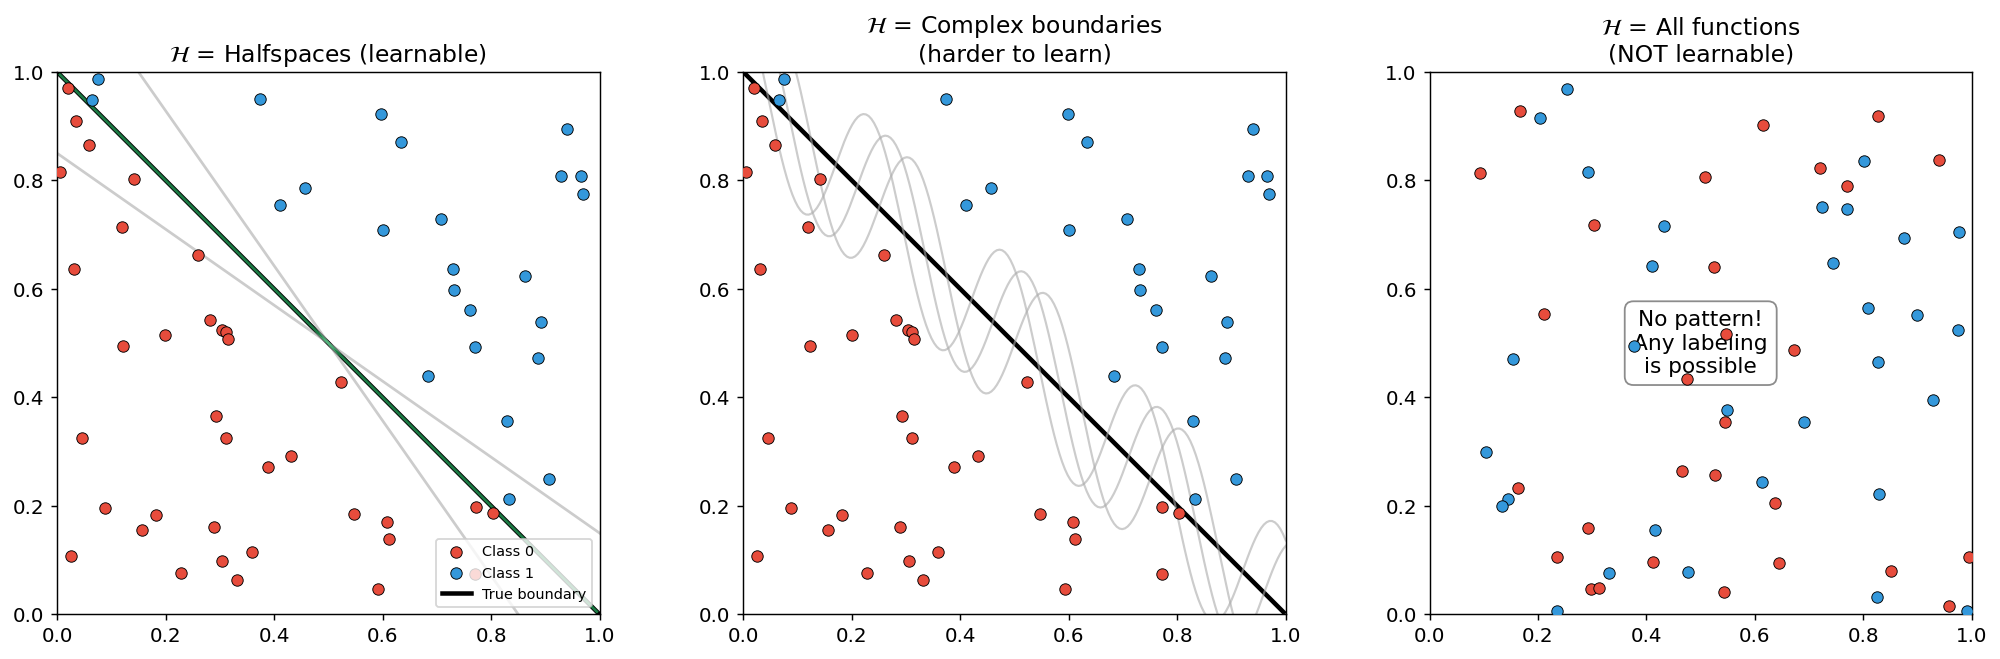

In [ ]:
# Visualize: Restricted vs unrestricted hypothesis classes in 2D

np.random.seed(42)
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Generate 2D data with a linear boundary
n_pts = 60
X = np.random.uniform(0, 1, (n_pts, 2))
y_true = (X[:, 0] + X[:, 1] >= 1).astype(int)

# --- LEFT: H = all halfspaces (restricted, learnable) ---
ax = axes[0]
c0 = y_true == 0
c1 = y_true == 1
ax.scatter(X[c0, 0], X[c0, 1], c='#e74c3c', s=40, edgecolor='black',
           linewidth=0.5, label='Class 0', zorder=5)
ax.scatter(X[c1, 0], X[c1, 1], c='#3498db', s=40, edgecolor='black',
           linewidth=0.5, label='Class 1', zorder=5)
# True boundary
ax.plot([0, 1], [1, 0], 'k-', linewidth=2.5, label='True boundary')
# A few candidate halfspaces
for angle, col in [(35, '#aaa'), (55, '#aaa'), (45, '#2ecc71')]:
    theta = np.deg2rad(angle)
    x1 = 0.5 - np.sin(theta)*0.7
    x2 = 0.5 + np.cos(theta)*0.7
    x3 = 0.5 + np.sin(theta)*0.7
    x4 = 0.5 - np.cos(theta)*0.7
    ax.plot([x1, x3], [x2, x4], color=col, linewidth=1.5, alpha=0.6)
ax.set_xlim(0, 1); ax.set_ylim(0, 1); ax.set_aspect('equal')
ax.set_title('$\\mathcal{H}$ = Halfspaces (learnable)')
ax.legend(fontsize=8, loc='lower right')

# --- MIDDLE: H = polynomials (bigger class) ---
ax = axes[1]
ax.scatter(X[c0, 0], X[c0, 1], c='#e74c3c', s=40, edgecolor='black',
           linewidth=0.5, zorder=5)
ax.scatter(X[c1, 0], X[c1, 1], c='#3498db', s=40, edgecolor='black',
           linewidth=0.5, zorder=5)
ax.plot([0, 1], [1, 0], 'k-', linewidth=2.5)
# Wiggly boundaries
for seed_off in range(3):
    t = np.linspace(0, 1, 200)
    np.random.seed(seed_off + 10)
    wiggle = 1 - t + 0.15 * np.sin(8*np.pi*t + seed_off)
    ax.plot(t, wiggle, color='#aaa', linewidth=1.2, alpha=0.6)
ax.set_xlim(0, 1); ax.set_ylim(0, 1); ax.set_aspect('equal')
ax.set_title('$\\mathcal{H}$ = Complex boundaries\n(harder to learn)')

# --- RIGHT: H = all functions (unlearnable) ---
ax = axes[2]
# Show a "crazy" labeling — random colors
np.random.seed(99)
X_rand = np.random.uniform(0, 1, (n_pts, 2))
y_rand = np.random.randint(0, 2, n_pts)
c0r = y_rand == 0
c1r = y_rand == 1
ax.scatter(X_rand[c0r, 0], X_rand[c0r, 1], c='#e74c3c', s=40, edgecolor='black',
           linewidth=0.5, zorder=5)
ax.scatter(X_rand[c1r, 0], X_rand[c1r, 1], c='#3498db', s=40, edgecolor='black',
           linewidth=0.5, zorder=5)
ax.text(0.5, 0.5, 'No pattern!\nAny labeling\nis possible', fontsize=12,
        ha='center', va='center',
        bbox=dict(boxstyle='round,pad=0.4', facecolor='white', edgecolor='gray', alpha=0.9))
ax.set_xlim(0, 1); ax.set_ylim(0, 1); ax.set_aspect('equal')
ax.set_title('$\\mathcal{H}$ = All functions\n(NOT learnable)')

plt.tight_layout()
plt.show()

---
## Slides 19–20 — The Need for Prior Knowledge (Inductive Bias)

- We **must** reduce $\mathcal{H}$ using prior knowledge — otherwise it's not PAC learnable
- Our choice of $\mathcal{H}$ captures our beliefs about how observed examples relate to unobserved ones
- This is called our **inductive bias**

### Breaking Down Inductive Bias

---

#### What Is Inductive Bias?

**Inductive bias** is the set of assumptions your learning algorithm makes to generalize beyond training data. It's encoded in your choice of $\mathcal{H}$.

**Examples**:
- **Linear regression**: assumes the relationship is (approximately) linear
- **Logistic regression**: assumes increasing a feature can only monotonically increase or decrease the probability of a class
- **Decision trees**: assumes the decision boundary is axis-aligned

#### Why "Bias" Isn't Bad Here

In everyday language, "bias" sounds negative. But in learning theory, *some* bias is **essential**:
- Without bias → $\mathcal{H}$ = all functions → not learnable (NFL theorem!)
- With bias → $\mathcal{H}$ is restricted → learnable, but only if your bias is reasonable

> "You must assume something about the world to learn anything from data."

---
## Slides 21–23 — Error Decomposition

The true error of ERM can be decomposed into two parts:

$$L_{\mathcal{D}}(h_S) = \epsilon_{\mathrm{app}} + \epsilon_{\mathrm{est}}$$

### Breaking Down the Error Decomposition

---

#### Part by Part

**$L_{\mathcal{D}}(h_S)$** — the total true error

How often the ERM hypothesis $h_S$ gets things wrong on the full population. This is what we ultimately care about.

**$\epsilon_{\mathrm{app}} = \min_{h \in \mathcal{H}} L_{\mathcal{D}}(h)$** — approximation error (bias)

The best any hypothesis in $\mathcal{H}$ can do. Even with infinite data, you can't do better than this — it's a fundamental limitation of your hypothesis class.

- If $\mathcal{H}$ contains a perfect hypothesis → $\epsilon_{\mathrm{app}} = 0$ (realizability)
- If $\mathcal{H}$ is too simple → $\epsilon_{\mathrm{app}}$ is large (underfitting)
- Only way to reduce it: **make $\mathcal{H}$ bigger**

**$\epsilon_{\mathrm{est}} = L_{\mathcal{D}}(h_S) - \epsilon_{\mathrm{app}}$** — estimation error (overfitting)

The extra error from picking $h_S$ using finite training data instead of having access to the true distribution. This is the gap between what ERM finds and what's optimally achievable in $\mathcal{H}$.

- Increases (logarithmically) with $|\mathcal{H}|$ — more hypotheses → more room to overfit
- Decreases with $m$ — more data → better estimation
- Only way to reduce it: **get more data** or **make $\mathcal{H}$ smaller**

---

#### The Whole Thing

> "Your model's total error = how limited your hypothesis class is (bias) + how much you're fooled by finite data (overfitting)."

#### The Tension

- Making $\mathcal{H}$ bigger **decreases** $\epsilon_{\mathrm{app}}$ but **increases** $\epsilon_{\mathrm{est}}$
- Making $\mathcal{H}$ smaller **increases** $\epsilon_{\mathrm{app}}$ but **decreases** $\epsilon_{\mathrm{est}}$
- This is the **bias-complexity tradeoff**

In [ ]:
# Error Decomposition: Approximation error vs Estimation error

np.random.seed(42)

# Scenario: true function is quadratic, hypothesis classes of increasing polynomial degree
x_range = np.linspace(0, 1, 200)
f_true = lambda x: np.sin(2 * np.pi * x) * 0.5 + 0.5  # true function

# Generate training data
m_train = 15
x_train = np.random.uniform(0, 1, m_train)
y_train = f_true(x_train) + np.random.normal(0, 0.15, m_train)

degrees = [1, 3, 5, 10]
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for i, deg in enumerate(degrees):
    # Fit polynomial of given degree
    coeffs = np.polyfit(x_train, y_train, deg)
    y_fit = np.polyval(coeffs, x_range)
    y_fit_train = np.polyval(coeffs, x_train)

    # Approximation error: best possible in class (use many points)
    x_dense = np.linspace(0, 1, 1000)
    y_dense = f_true(x_dense)
    coeffs_best = np.polyfit(x_dense, y_dense, deg)
    y_best = np.polyval(coeffs_best, x_dense)
    eps_app = np.mean((y_best - y_dense)**2)

    # Total error
    y_fit_dense = np.polyval(coeffs, x_dense)
    eps_total = np.mean((y_fit_dense - y_dense)**2)
    eps_est = eps_total - eps_app

    # --- TOP: fitted curve ---
    ax = axes[0, i]
    ax.scatter(x_train, y_train, s=30, c='#3498db', edgecolor='black',
               linewidth=0.5, zorder=5, label='Training data')
    ax.plot(x_range, f_true(x_range), 'k--', linewidth=1.5, alpha=0.5,
            label='True function')
    ax.plot(x_range, y_fit, color='#e74c3c', linewidth=2, label=f'Degree {deg} fit')
    ax.set_title(f'Degree {deg}', fontsize=12)
    ax.set_ylim(-0.5, 1.5)
    if i == 0:
        ax.set_ylabel('y')
        ax.legend(fontsize=7, loc='upper right')

    # --- BOTTOM: error bars ---
    ax = axes[1, i]
    bars = ax.bar(['Approx.\n(bias)', 'Estim.\n(overfit)', 'Total'],
                  [eps_app, max(eps_est, 0), eps_total],
                  color=['#f39c12', '#9b59b6', '#e74c3c'],
                  edgecolor='black')
    ax.set_ylim(0, max(0.35, eps_total * 1.3))
    ax.set_title(f'Error breakdown', fontsize=10)
    for bar, val in zip(bars, [eps_app, max(eps_est, 0), eps_total]):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                f'{val:.3f}', ha='center', fontsize=9)

axes[0, 0].set_ylabel('y')
axes[1, 0].set_ylabel('MSE')
fig.suptitle('Error Decomposition: Increasing Hypothesis Class Complexity',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

---
## Slide 24 — Approximation Error (Bias)

$$\epsilon_{\mathrm{app}} = \min_{h \in \mathcal{H}} L_{\mathcal{D}}(h)$$

### Breaking Down Approximation Error

---

#### Part by Part

**$\min_{h \in \mathcal{H}}$** — search over the entire hypothesis class

Look at every single hypothesis in $\mathcal{H}$ and find the one with the smallest true error.

**$L_{\mathcal{D}}(h)$** — true error of hypothesis $h$

The expected loss over the entire data distribution (not just training data).

---

#### The Whole Thing

> "Approximation error is the best your hypothesis class can possibly do, even with unlimited data. It's the *floor* on your performance."

#### Key Properties

- **Independent of training data**: It only depends on $\mathcal{H}$ and $\mathcal{D}$
- **Independent of training set size $m$**: More data won't help if $\mathcal{H}$ doesn't contain a good hypothesis
- **Under realizability**: $\epsilon_{\mathrm{app}} = 0$ (by definition, a perfect $h^\star$ exists in $\mathcal{H}$)
- **Only fix**: Enlarge $\mathcal{H}$ (but this increases estimation error!)

In [ ]:
# Approximation Error: The best your class can do

np.random.seed(42)

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

x_range = np.linspace(0, 1, 500)
f_true = lambda x: np.sin(2 * np.pi * x) * 0.5 + 0.5

classes = [
    ('Constant', 0),
    ('Linear', 1),
    ('Degree 6', 6),
]

for i, (name, deg) in enumerate(classes):
    ax = axes[i]

    # Best fit in this class (with lots of data)
    x_dense = np.linspace(0, 1, 2000)
    y_dense = f_true(x_dense)
    coeffs = np.polyfit(x_dense, y_dense, deg)
    y_best = np.polyval(coeffs, x_range)

    ax.plot(x_range, f_true(x_range), 'k-', linewidth=2.5, label='True function')
    ax.plot(x_range, y_best, color='#e74c3c', linewidth=2, linestyle='--',
            label=f'Best {name}')

    # Shade the gap
    ax.fill_between(x_range, f_true(x_range), y_best, alpha=0.2, color='#f39c12')

    eps_app = np.mean((np.polyval(coeffs, x_dense) - y_dense)**2)
    ax.set_title(f'$\\mathcal{{H}}$ = {name}\n$\\epsilon_{{app}}$ = {eps_app:.4f}')
    ax.set_ylim(-0.3, 1.3)
    ax.legend(fontsize=9)
    if i == 0:
        ax.set_ylabel('y')

fig.suptitle('Approximation Error: Bigger class = smaller bias',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

---
## Slide 25 — Estimation Error

$$\epsilon_{\mathrm{est}} = L_{\mathcal{D}}(h_S) - \epsilon_{\mathrm{app}}$$

### Breaking Down Estimation Error

---

#### Part by Part

**$L_{\mathcal{D}}(h_S)$** — total true error of the ERM hypothesis

What the learned model actually achieves — including both unavoidable bias and data-dependent noise.

**$\epsilon_{\mathrm{app}}$** — subtract the approximation error

Remove the part of the error that's due to the class limitation. What remains is purely from finite-data effects.

---

#### The Whole Thing

> "Estimation error is how much worse ERM does compared to the best hypothesis in the class — it's the extra error from having limited training data."

#### Key Properties

- **Depends on training set size $m$**: More data → smaller estimation error
- **Depends on $|\mathcal{H}|$**: Larger class → more estimation error (for finite classes, it grows as $\log |\mathcal{H}|$)
- **Goes to 0 as $m \to \infty$**: With enough data, ERM finds the best hypothesis in $\mathcal{H}$
- **Only fix**: Get more data, or shrink $\mathcal{H}$ (but shrinking increases approximation error!)

#### Connection to PAC Bound

From the PAC bound: with $m \geq \log(|\mathcal{H}|/\delta)/\epsilon$ examples:

$$\epsilon_{\mathrm{est}} \leq \epsilon$$

with probability $\geq 1 - \delta$. So estimation error is bounded by $\sim \log(|\mathcal{H}|)/m$.

In [ ]:
# Estimation Error: decreases with more training data

np.random.seed(42)

# True function
f_true = lambda x: np.sin(2 * np.pi * x) * 0.5 + 0.5
x_dense = np.linspace(0, 1, 2000)
y_dense = f_true(x_dense)

# Hypothesis class: degree-3 polynomials
deg = 3
# Best possible in class
coeffs_best = np.polyfit(x_dense, y_dense, deg)
eps_app = np.mean((np.polyval(coeffs_best, x_dense) - y_dense)**2)

# Try different training set sizes
m_values = [5, 10, 20, 50, 100, 200, 500]
n_repeats = 200

est_errors_mean = []
est_errors_std = []

for m in m_values:
    ests = []
    for _ in range(n_repeats):
        x_train = np.random.uniform(0, 1, m)
        y_train = f_true(x_train) + np.random.normal(0, 0.15, m)
        coeffs = np.polyfit(x_train, y_train, deg)
        y_pred = np.polyval(coeffs, x_dense)
        total_err = np.mean((y_pred - y_dense)**2)
        ests.append(total_err - eps_app)
    est_errors_mean.append(np.mean(ests))
    est_errors_std.append(np.std(ests))

est_errors_mean = np.array(est_errors_mean)
est_errors_std = np.array(est_errors_std)

fig, axes = plt.subplots(1, 2, figsize=(14, 5.5))

# --- LEFT: estimation error vs m ---
ax = axes[0]
ax.errorbar(m_values, est_errors_mean, yerr=est_errors_std, fmt='o-',
            color='#9b59b6', linewidth=2, markersize=8, capsize=5,
            label=r'$\epsilon_{\mathrm{est}}$ (mean $\pm$ 1 std)')
ax.axhline(y=0, color='gray', linewidth=0.5)
ax.set_xlabel('Training set size $m$')
ax.set_ylabel(r'Estimation error $\epsilon_{\mathrm{est}}$')
ax.set_title(f'Estimation Error vs Training Size\n($\\mathcal{{H}}$ = degree-{deg} polynomials)')
ax.set_xscale('log')
ax.legend(fontsize=10)

# --- RIGHT: show 3 example fits at different m ---
ax = axes[1]
x_range = np.linspace(0, 1, 200)
ax.plot(x_range, f_true(x_range), 'k-', linewidth=2.5, label='True function')

for m, col, ls in [(5, '#e74c3c', '--'), (20, '#f39c12', '-.'), (200, '#2ecc71', '-')]:
    np.random.seed(42)
    x_tr = np.random.uniform(0, 1, m)
    y_tr = f_true(x_tr) + np.random.normal(0, 0.15, m)
    c = np.polyfit(x_tr, y_tr, deg)
    ax.plot(x_range, np.polyval(c, x_range), color=col, linewidth=2, linestyle=ls,
            label=f'm = {m}')

ax.set_ylim(-0.3, 1.3)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('ERM fit improves with more data')
ax.legend(fontsize=9)

plt.tight_layout()
plt.show()

print(f"Approximation error (degree-{deg}): {eps_app:.5f}")
print(f"Estimation error at m=5:   {est_errors_mean[0]:.5f}")
print(f"Estimation error at m=500: {est_errors_mean[-1]:.5f}")

---
## Slides 26–28 — The Bias-Complexity Tradeoff

One must **balance** approximation and estimation error when choosing $\mathcal{H}$:

| | Too small $\mathcal{H}$ | Too large $\mathcal{H}$ |
|---|---|---|
| Approx. error | **High** (underfitting) | **Low** |
| Estim. error | **Low** | **High** (overfitting) |
| Total error | High | High |

The sweet spot minimizes **total** error: $L_{\mathcal{D}}(h_S) = \epsilon_{\mathrm{app}} + \epsilon_{\mathrm{est}}$.

### Breaking Down the Tradeoff

---

#### Why It's a Tradeoff

**Making $\mathcal{H}$ bigger**:
- More hypotheses to choose from → *more likely* one of them fits the true pattern → $\epsilon_{\mathrm{app}}$ shrinks
- But also more hypotheses that could *accidentally* fit the training noise → $\epsilon_{\mathrm{est}}$ grows

**Making $\mathcal{H}$ smaller**:
- Fewer hypotheses → less chance of overfitting → $\epsilon_{\mathrm{est}}$ shrinks
- But the best hypothesis in the class might be a poor approximation → $\epsilon_{\mathrm{app}}$ grows

#### The Sweet Spot

> "The best hypothesis class is not the simplest or the most complex — it's the one that balances the cost of being too simple against the cost of being too complex."

This is the fundamental tradeoff in all of machine learning. It shows up as:
- **Regularization strength** in linear models
- **Tree depth** in decision trees
- **Number of layers/neurons** in neural networks
- **Polynomial degree** in regression

In [ ]:
# THE Bias-Complexity Tradeoff Curve (matching the slide diagram)

np.random.seed(42)

# True function
f_true = lambda x: np.sin(2 * np.pi * x) * 0.5 + 0.5
x_dense = np.linspace(0, 1, 2000)
y_dense = f_true(x_dense)

# Fixed training set
m_train = 25
x_train = np.random.uniform(0, 1, m_train)
y_train = f_true(x_train) + np.random.normal(0, 0.15, m_train)

degrees = list(range(1, 16))
n_repeats = 300

approx_errors = []
estim_errors = []
total_errors = []

for deg in degrees:
    # Approximation error (best in class with unlimited data)
    coeffs_best = np.polyfit(x_dense, y_dense, deg)
    eps_app = np.mean((np.polyval(coeffs_best, x_dense) - y_dense)**2)
    approx_errors.append(eps_app)

    # Estimation error (averaged over many training sets)
    totals = []
    for _ in range(n_repeats):
        xt = np.random.uniform(0, 1, m_train)
        yt = f_true(xt) + np.random.normal(0, 0.15, m_train)
        try:
            c = np.polyfit(xt, yt, deg)
            yp = np.polyval(c, x_dense)
            # Clip wild extrapolation
            yp = np.clip(yp, -5, 5)
            totals.append(np.mean((yp - y_dense)**2))
        except np.RankWarning:
            pass
    avg_total = np.mean(totals) if totals else eps_app
    total_errors.append(avg_total)
    estim_errors.append(avg_total - eps_app)

approx_errors = np.array(approx_errors)
estim_errors = np.array(estim_errors)
total_errors = np.array(total_errors)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.plot(degrees, approx_errors, 'o-', color='#f39c12', linewidth=2.5, markersize=7,
        label=r'Approximation error $\epsilon_{\mathrm{app}}$ (bias)')
ax.plot(degrees, np.maximum(estim_errors, 0), 's-', color='#9b59b6', linewidth=2.5,
        markersize=7, label=r'Estimation error $\epsilon_{\mathrm{est}}$ (overfitting)')
ax.plot(degrees, total_errors, 'D-', color='#e74c3c', linewidth=2.5, markersize=7,
        label=r'Total error $L_{\mathcal{D}}(h_S)$')

# Mark the sweet spot
best_deg_idx = np.argmin(total_errors)
ax.axvline(x=degrees[best_deg_idx], color='#2ecc71', linewidth=2, linestyle='--', alpha=0.7)
ax.scatter([degrees[best_deg_idx]], [total_errors[best_deg_idx]], s=200, c='#2ecc71',
           edgecolor='black', linewidth=2, zorder=10, marker='*')
ax.text(degrees[best_deg_idx] + 0.3, total_errors[best_deg_idx] + 0.01,
        f'Best: degree {degrees[best_deg_idx]}', fontsize=11, color='#2ecc71',
        fontweight='bold')

# Annotate regions
ax.annotate('Underfitting\n(high bias)', xy=(2, total_errors[1]),
            xytext=(1.5, total_errors[1] + 0.06), fontsize=11, color='#e67e22',
            fontweight='bold', ha='center',
            arrowprops=dict(arrowstyle='->', color='#e67e22'))
if len(degrees) > 10:
    ax.annotate('Overfitting\n(high variance)', xy=(degrees[-2], total_errors[-2]),
                xytext=(degrees[-2] - 1, total_errors[-2] + 0.06), fontsize=11,
                color='#8e44ad', fontweight='bold', ha='center',
                arrowprops=dict(arrowstyle='->', color='#8e44ad'))

ax.set_xlabel('Hypothesis class complexity (polynomial degree)', fontsize=12)
ax.set_ylabel('Error (MSE)', fontsize=12)
ax.set_title('The Bias-Complexity Tradeoff', fontsize=15, fontweight='bold')
ax.legend(fontsize=10, loc='upper center')
ax.set_xticks(degrees)
ax.set_ylim(bottom=0)

plt.tight_layout()
plt.show()

---
## Slides 29–30 — Question: Order These Classes by Increasing Bias

Let $\mathcal{X} = \mathbb{R}^d$ and $\mathcal{Y} = \{1, -1\}$.

| Label | Hypothesis Class | Description |
|---|---|---|
| **A** | $\mathcal{H}_A$ | The single halfspace with $w_i = 1$ for all $i$ |
| **B** | $\mathcal{H}_B$ | All intersections of all halfspaces |
| **C** | $\mathcal{H}_C$ | All halfspaces with $w_i \in \{-1, 1\}$ |
| **D** | $\mathcal{H}_D$ | All halfspaces on $\mathbb{R}^d$ |

**Answer: B, D, C, A** (least to most bias)

### Breaking Down the Ordering

---

#### Part by Part

**$\mathcal{H}_B \supset \mathcal{H}_D \supset \mathcal{H}_C \supset \mathcal{H}_A$** — subset chain

Each class is contained in the previous one:
- **B** (intersections of halfspaces) can represent any convex region and more
- **D** (all halfspaces) is a subset — it can only do single linear boundaries
- **C** (halfspaces with $\pm 1$ weights) is a subset of D — you can't pick arbitrary weights
- **A** (one fixed halfspace) is a single element — no flexibility at all

**From the subset chain**:

$$\min_{h \in \mathcal{H}_B} L_{\mathcal{D}}(h) \leq \min_{h \in \mathcal{H}_D} L_{\mathcal{D}}(h) \leq \min_{h \in \mathcal{H}_C} L_{\mathcal{D}}(h) \leq \min_{h \in \mathcal{H}_A} L_{\mathcal{D}}(h)$$

Larger class → lower approximation error → less bias.

---

#### The Whole Thing

> "A bigger hypothesis class can always do at least as well as a smaller one (in terms of best-possible error), because it contains all the smaller class's hypotheses plus more."

#### The Catch

Less bias doesn't mean less *total* error! Class B has the least bias but the most estimation error — it's the most prone to overfitting.

In [ ]:
# Visualize nested hypothesis classes and their bias-complexity tradeoff

np.random.seed(42)
fig, axes = plt.subplots(1, 4, figsize=(18, 4.5))

# Generate 2D data with a non-linear boundary
n_pts = 100
X = np.random.uniform(-2, 2, (n_pts, 2))
y = ((X[:, 0]**2 + X[:, 1]**2) < 2).astype(int)  # circular boundary

# Class A: single fixed halfspace (w = [1, 1])
ax = axes[0]
c0 = y == 0
c1 = y == 1
ax.scatter(X[c0, 0], X[c0, 1], c='#e74c3c', s=25, alpha=0.6, edgecolor='none')
ax.scatter(X[c1, 0], X[c1, 1], c='#3498db', s=25, alpha=0.6, edgecolor='none')
# Decision boundary: x1 + x2 = 0
ax.plot([-2, 2], [2, -2], 'k-', linewidth=2.5)
ax.fill_between([-2, 2], [2, -2], [2, 2], alpha=0.1, color='#3498db')
ax.fill_between([-2, 2], [-2, -2], [2, -2], alpha=0.1, color='#e74c3c')
# Compute error
pred_A = (X[:, 0] + X[:, 1] >= 0).astype(int)
err_A = np.mean(pred_A != y)
ax.set_title(f'$\\mathcal{{H}}_A$: Fixed halfspace\n$\\epsilon_{{app}} \\approx$ {err_A:.2f}', fontsize=11)
ax.set_xlim(-2, 2); ax.set_ylim(-2, 2); ax.set_aspect('equal')

# Class C: halfspaces with w_i in {-1, 1}
ax = axes[1]
ax.scatter(X[c0, 0], X[c0, 1], c='#e74c3c', s=25, alpha=0.6, edgecolor='none')
ax.scatter(X[c1, 0], X[c1, 1], c='#3498db', s=25, alpha=0.6, edgecolor='none')
# Best among {-1,1} weight halfspaces
best_err_C = 1.0
best_line = None
for w1 in [-1, 1]:
    for w2 in [-1, 1]:
        pred = (w1 * X[:, 0] + w2 * X[:, 1] >= 0).astype(int)
        e = np.mean(pred != y)
        if e < best_err_C:
            best_err_C = e
            best_line = (w1, w2)
        ax.plot([-2, 2],
                [-(w1*(-2))/w2 if w2 != 0 else 0, -(w1*2)/w2 if w2 != 0 else 0],
                color='gray', linewidth=1, alpha=0.3)
# Draw best
w1, w2 = best_line
ax.plot([-2, 2], [-(w1*(-2))/w2, -(w1*2)/w2], 'k-', linewidth=2.5)
ax.set_title(f'$\\mathcal{{H}}_C$: $w_i \\in \\{{-1,1\\}}$\n$\\epsilon_{{app}} \\approx$ {best_err_C:.2f}', fontsize=11)
ax.set_xlim(-2, 2); ax.set_ylim(-2, 2); ax.set_aspect('equal')

# Class D: all halfspaces
ax = axes[2]
ax.scatter(X[c0, 0], X[c0, 1], c='#e74c3c', s=25, alpha=0.6, edgecolor='none')
ax.scatter(X[c1, 0], X[c1, 1], c='#3498db', s=25, alpha=0.6, edgecolor='none')
# Draw many candidate halfspaces
for angle in np.linspace(0, np.pi, 20):
    dx = 2 * np.cos(angle)
    dy = 2 * np.sin(angle)
    ax.plot([-dx, dx], [-dy, dy], color='gray', linewidth=0.5, alpha=0.2)
# Best halfspace (approximate by trying many)
best_err_D = 1.0
for angle in np.linspace(0, 2*np.pi, 360):
    w = np.array([np.cos(angle), np.sin(angle)])
    for b in np.linspace(-2, 2, 20):
        pred = (X @ w + b >= 0).astype(int)
        e = np.mean(pred != y)
        if e < best_err_D:
            best_err_D = e
ax.plot([-2, 2], [0, 0], 'k-', linewidth=2.5)  # approximate best
ax.set_title(f'$\\mathcal{{H}}_D$: All halfspaces\n$\\epsilon_{{app}} \\approx$ {best_err_D:.2f}', fontsize=11)
ax.set_xlim(-2, 2); ax.set_ylim(-2, 2); ax.set_aspect('equal')

# Class B: intersections of halfspaces (can approximate circle)
ax = axes[3]
ax.scatter(X[c0, 0], X[c0, 1], c='#e74c3c', s=25, alpha=0.6, edgecolor='none')
ax.scatter(X[c1, 0], X[c1, 1], c='#3498db', s=25, alpha=0.6, edgecolor='none')
# Draw octagonal approximation of circle
n_sides = 8
theta_poly = np.linspace(0, 2*np.pi, n_sides + 1)
r = np.sqrt(2) * 0.97
for i in range(n_sides):
    ax.plot([r*np.cos(theta_poly[i]), r*np.cos(theta_poly[i+1])],
            [r*np.sin(theta_poly[i]), r*np.sin(theta_poly[i+1])],
            'k-', linewidth=2)
# True circle for reference
theta_circ = np.linspace(0, 2*np.pi, 100)
ax.plot(np.sqrt(2)*np.cos(theta_circ), np.sqrt(2)*np.sin(theta_circ),
        'k--', linewidth=1, alpha=0.3)
# Approximate error
pred_B = ((X[:, 0]**2 + X[:, 1]**2) < 2.1).astype(int)  # nearly perfect
err_B = np.mean(pred_B != y)
ax.set_title(f'$\\mathcal{{H}}_B$: Intersections of halfspaces\n$\\epsilon_{{app}} \\approx$ {err_B:.2f}', fontsize=11)
ax.set_xlim(-2, 2); ax.set_ylim(-2, 2); ax.set_aspect('equal')

fig.suptitle('Nested Hypothesis Classes: $\\mathcal{H}_A \\subset \\mathcal{H}_C \\subset \\mathcal{H}_D \\subset \\mathcal{H}_B$ (more bias $\\leftarrow$ $\\rightarrow$ less bias)',
             fontsize=13, fontweight='bold', y=1.03)
plt.tight_layout()
plt.show()

---
## Slides 31–32 — Example: Google Flu Trends

A cautionary tale about the bias-complexity tradeoff in practice:

- **Google Flu Trends** used search query data to predict flu epidemics in 25 countries
- The model had **too many features** (search terms) relative to the data available
- Result: it **massively overestimated** flu outbreaks and missed others

### What Went Wrong?

This is **overfitting** ($\epsilon_{\mathrm{est}}$ too large):
- The hypothesis class was too rich — the model found spurious correlations in search data
- With enough features, you can "explain" any pattern in the training data, even noise
- When deployed on new data, these spurious patterns didn't hold up

### The Lesson

> "Big data doesn't save you from overfitting if your hypothesis class grows even faster than your data."

This is sometimes called **"Big Data Hubris"** — the false belief that more data automatically means better predictions, ignoring the complexity of the model being fit.

In [ ]:
# Grand Summary: Bias-Complexity Tradeoff with simulation
# Use nested hypothesis classes on 2D data to show the tradeoff empirically

np.random.seed(42)

# True function: quadratic boundary
def true_label(X):
    return (X[:, 0]**2 + 0.5 * X[:, 1]**2 < 1).astype(int)

# Hypothesis classes of increasing complexity (polynomial features)
from numpy.polynomial.polynomial import polyvander2d

def poly_features(X, degree):
    '''Create polynomial features up to given degree.'''
    feats = []
    for i in range(degree + 1):
        for j in range(degree + 1 - i):
            feats.append(X[:, 0]**i * X[:, 1]**j)
    return np.column_stack(feats)

# Generate test data (proxy for true distribution)
n_test = 5000
X_test = np.random.uniform(-2, 2, (n_test, 2))
y_test = true_label(X_test)

# Training set sizes to try
m_values = [20, 50, 100, 200]
degrees = [1, 2, 3, 5, 8, 12]
n_repeats = 100

fig, axes = plt.subplots(2, 2, figsize=(14, 11))

for mi, m in enumerate(m_values):
    ax = axes[mi // 2, mi % 2]

    app_errs = []
    est_errs = []
    total_errs = []

    for deg in degrees:
        # Approximation error: use huge training set
        X_big = np.random.uniform(-2, 2, (10000, 2))
        y_big = true_label(X_big)
        F_big = poly_features(X_big, deg)
        try:
            w_best = np.linalg.lstsq(F_big, y_big, rcond=None)[0]
            pred_best = (poly_features(X_test, deg) @ w_best >= 0.5).astype(int)
            eps_app = np.mean(pred_best != y_test)
        except Exception:
            eps_app = 0.5
        app_errs.append(eps_app)

        # Total error averaged over random training sets
        tots = []
        for _ in range(n_repeats):
            X_tr = np.random.uniform(-2, 2, (m, 2))
            y_tr = true_label(X_tr)
            F_tr = poly_features(X_tr, deg)
            F_te = poly_features(X_test, deg)
            try:
                w = np.linalg.lstsq(F_tr, y_tr, rcond=None)[0]
                pred = (F_te @ w >= 0.5).astype(int)
                tots.append(np.mean(pred != y_test))
            except Exception:
                tots.append(0.5)
        avg_total = np.mean(tots)
        total_errs.append(avg_total)
        est_errs.append(avg_total - eps_app)

    ax.plot(degrees, app_errs, 'o-', color='#f39c12', linewidth=2, markersize=6,
            label=r'$\epsilon_{\mathrm{app}}$ (bias)')
    ax.plot(degrees, [max(0, e) for e in est_errs], 's-', color='#9b59b6',
            linewidth=2, markersize=6, label=r'$\epsilon_{\mathrm{est}}$ (overfit)')
    ax.plot(degrees, total_errs, 'D-', color='#e74c3c', linewidth=2, markersize=6,
            label=r'Total $L_{\mathcal{D}}(h_S)$')

    best_idx = np.argmin(total_errs)
    ax.axvline(x=degrees[best_idx], color='#2ecc71', linewidth=1.5, linestyle='--', alpha=0.7)

    ax.set_xlabel('Polynomial degree')
    ax.set_ylabel('Error (0-1 loss)')
    ax.set_title(f'm = {m} training examples', fontsize=12, fontweight='bold')
    ax.legend(fontsize=8)
    ax.set_ylim(0, 0.55)
    ax.set_xticks(degrees)

fig.suptitle('Bias-Complexity Tradeoff at Different Training Set Sizes',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

---
## Summary

### The No-Free-Lunch Theorem (Slides 6–12)

- **No universal learner exists**: for every algorithm, there's a task where it fails
- If you see fewer than $|\mathcal{X}|/2$ examples, an adversary can always design a bad distribution
- The class of **all functions** on an infinite domain is **not** PAC learnable
- But this does NOT mean all infinite classes are unlearnable

### The Need for Prior Knowledge (Slides 19–20)

- You **must** restrict $\mathcal{H}$ — this is your **inductive bias**
- Without restriction: not learnable (NFL)
- With good restriction: learnable and generalizable

### Error Decomposition (Slides 21–25)

$$L_{\mathcal{D}}(h_S) = \underbrace{\min_{h \in \mathcal{H}} L_{\mathcal{D}}(h)}_{\epsilon_{\mathrm{app}} \text{ (bias)}} + \underbrace{L_{\mathcal{D}}(h_S) - \min_{h \in \mathcal{H}} L_{\mathcal{D}}(h)}_{\epsilon_{\mathrm{est}} \text{ (overfitting)}}$$

### The Bias-Complexity Tradeoff (Slides 26–28)

| Make $\mathcal{H}$ bigger | Make $\mathcal{H}$ smaller |
|---|---|
| $\epsilon_{\mathrm{app}}$ ↓ (less bias) | $\epsilon_{\mathrm{app}}$ ↑ (more bias) |
| $\epsilon_{\mathrm{est}}$ ↑ (more overfitting) | $\epsilon_{\mathrm{est}}$ ↓ (less overfitting) |

> **The art of machine learning is finding the sweet spot.**

### Next Time

How do we balance the bias-complexity tradeoff in practice? → Regularization, cross-validation, and more.